In [17]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
#read the data file into a pandas dataframe
df = pd.read_csv('diabetes.csv')
print df.columns

Index([u'Pregnancies', u'Glucose', u'BloodPressure', u'SkinThickness',
       u'Insulin', u'BMI', u'DiabetesPedigreeFunction', u'Age', u'Outcome'],
      dtype='object')


In [5]:
#Prepare the feature and label sets
X = df.drop('Outcome', 1)
y = df['Outcome']

In [7]:
#Split the training and testing states because it is always best to test on unseen data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.70, random_state = 40)

In [8]:
#Check accuracies in different classifiers
classifiers = [['DecisionTree :',DecisionTreeClassifier()], ['RandomForest :',RandomForestClassifier()], ['Naive Bayes :', GaussianNB()], ['KNeighbours :', KNeighborsClassifier(n_neighbors = 2)], ['SVM :', SVC()], ['Neural Network :', MLPClassifier()]]
for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train, y_train)
    print name,classifier.score(X_test, y_test)

DecisionTree : 0.687732342007
RandomForest : 0.723048327138
Naive Bayes : 0.765799256506
KNeighbours : 0.67843866171
SVM : 0.644981412639
Neural Network : 0.667286245353


In [10]:
#Find importance of features in descending order
rf =  RandomForestRegressor()
rf.fit(X, y)
feature_names = X.columns
print sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), feature_names), reverse=True)

[(0.3288, 'Glucose'), (0.178, 'BMI'), (0.1371, 'Age'), (0.1327, 'DiabetesPedigreeFunction'), (0.0859, 'BloodPressure'), (0.058, 'Pregnancies'), (0.0436, 'Insulin'), (0.0359, 'SkinThickness')]


In [11]:
#Choose the top 4 features and prepared the training and testing sets
X = df.drop(['Outcome','SkinThickness', 'BloodPressure','Insulin','Pregnancies'], 1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.70, random_state = 40)

In [13]:
#Checked the classifier scores again and this time we attain a higher accuracy in Naive Bayes of 0.79
for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train, y_train)
    print name,classifier.score(X_test, y_test)

DecisionTree : 0.697026022305
RandomForest : 0.756505576208
Naive Bayes : 0.791821561338
KNeighbours : 0.682156133829
SVM : 0.639405204461
Neural Network : 0.449814126394


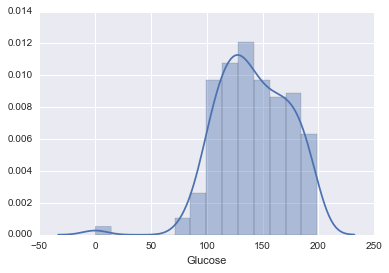

In [18]:
plt.figure()
sns.distplot(df.loc[df['Outcome'] == 1 , 'Glucose'])

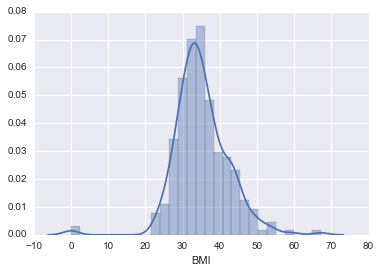

In [19]:
plt.figure()
sns.distplot(df.loc[df['Outcome'] == 1 , 'BMI'])

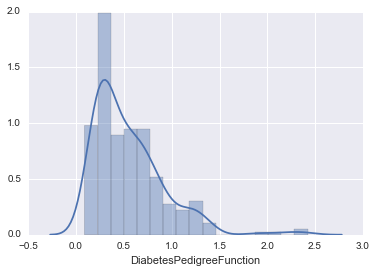

In [20]:
plt.figure()
sns.distplot(df.loc[df['Outcome'] == 1 , 'DiabetesPedigreeFunction'])

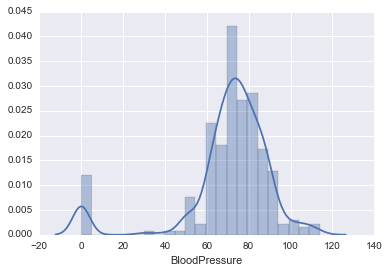

In [21]:
plt.figure()
sns.distplot(df.loc[df['Outcome'] == 1 , 'BloodPressure'])